<a href="https://colab.research.google.com/github/Amanpatel2002-g/Learning-Pytorch/blob/main/01_pytorch_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt


In [ ]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create 
start = 0
end = 1
step = 0.02

X = torch.arange(start,end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]), 50, 50)

### Splitting data into training and test sets (one of the most important concept in machine learning)

Let's create a training and test set with our split

In [ ]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
def plot_prediction(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
    Plots training data, test data nd compares predictions.
  """

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data,  test_labels, c="g", s=4, label="testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # show the legend
  plt.legend(prop={"size":14});    


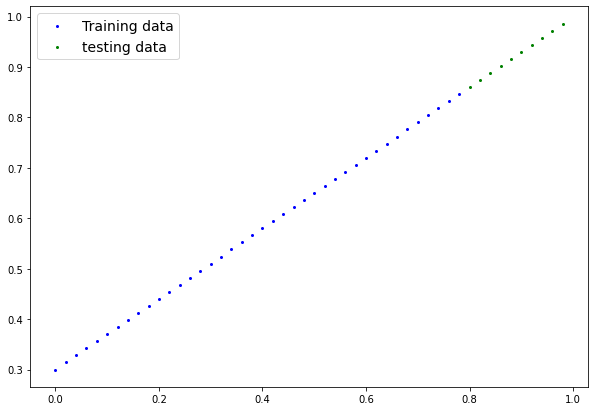

In [ ]:
plot_prediction()

## Now we are writing the code for linear regression 😊 I am super happy

In [ ]:
from torch import nn

# create Linear Regression model class 

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


### Pytorch model buidling essentials

* torch.nn - contains all of the building for computational graphs(a neural network)
* torch.nn.parameter - what parameters should our model try and leasrn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.module subclass require you to overwrite forward(, this method defines what happensin the forward computation

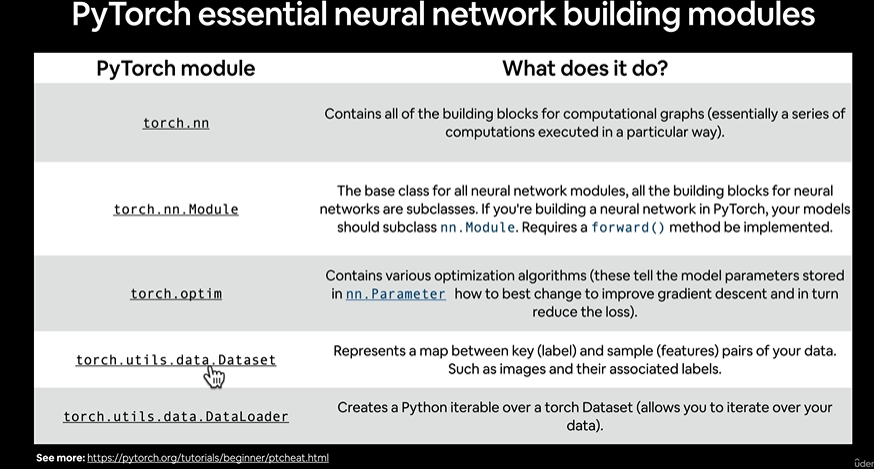

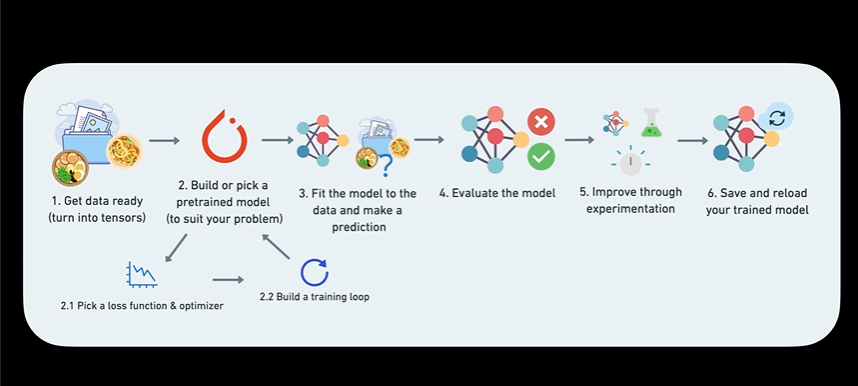

### Checking the contents of our pytroch model

Now we've created a model, let's see what's inside ...
so we can check our model parameters or hhat's inside our model using `.parameters()`

In [ ]:
# Create a randome seed 
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)

model_0 = LinearRegression()

# check out the paramenters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List Named paramenters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_models()`


In [ ]:
# Make prediction with model:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

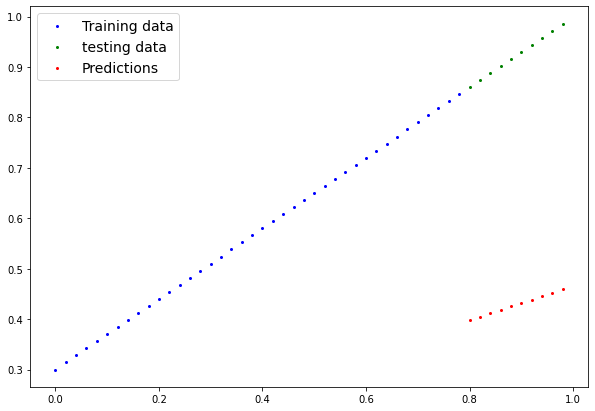

In [ ]:
plot_prediction(predictions=y_preds)

In [ ]:
## 3. Train model

torch.__version__

'1.13.0+cu116'

In [ ]:
# set-up a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
loss_fn

L1Loss()

### Building a training loop (and a testing loop) in PyTorch

In [ ]:
# An epoch is one loop through the dataa... (this is a hyperparameter because we've set it by ourself)
epochs = 1

# 0. Loop through the data:
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in pytorch sets all parameters that requires graidents to the  

  # 1. Forward  pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. step the optimizer (perform graident descent)
  optimizer.step() # by default how the optimizer changees will accumulate through the loop as ... we have t zero them above is step 3

  # Testing
  model_0.eval() # turns off the gradient tracking

  # print the model weights
  print(model_0.state_dict())

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])


In [ ]:
 model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [ ]:
weight, bias

(0.7, 0.3)

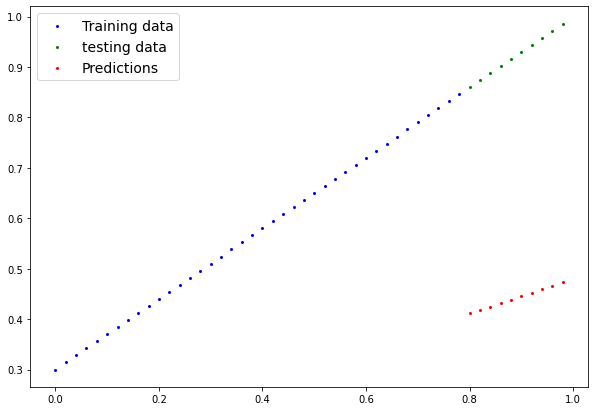

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_prediction(predictions=y_preds_new)

In [ ]:
# An epoch is one loop through the dataa... (this is a hyperparameter because we've set it by ourself)
epochs = 200

# Track the values
epoch_count = []
loss_values = []
test_loss_values = []


# 0. Loop through the data:
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in pytorch sets all parameters that requires graidents to the  

  # 1. Forward  pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. step the optimizer (perform graident descent)
  optimizer.step() # by default how the optimizer changees will accumulate through the loop as ... we have t zero them above is step 3

  # Testing
  model_0.eval() # turns off the gradient tracking
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)
  
  # print out what's happening
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss:{loss} | Test loss: {test_loss}")

  # print the model weights
    print(model_0.state_dict())
  # print(model_0.state_dict())

Epoch: 0 | Loss:0.3013603389263153 | Test loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Epoch: 10 | Loss:0.18615034222602844 | Test loss: 0.3328842222690582
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
Epoch: 20 | Loss:0.08227583020925522 | Test loss: 0.2069590985774994
OrderedDict([('weights', tensor([0.4222])), ('bias', tensor([0.3403]))])
Epoch: 30 | Loss:0.05181945487856865 | Test loss: 0.14023718237876892
OrderedDict([('weights', tensor([0.4539])), ('bias', tensor([0.3788]))])
Epoch: 40 | Loss:0.04503796249628067 | Test loss: 0.11182951927185059
OrderedDict([('weights', tensor([0.4768])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss:0.04132963344454765 | Test loss: 0.09809747338294983
OrderedDict([('weights', tensor([0.4956])), ('bias', tensor([0.3838]))])
Epoch: 60 | Loss:0.03785243630409241 | Test loss: 0.08776430785655975
OrderedDict([('weights', tensor([0.5134])), ('bias', tensor([0.3783]))])
Epoc

In [ ]:
test_loss_values

[tensor(0.4676),
 tensor(0.3329),
 tensor(0.2070),
 tensor(0.1402),
 tensor(0.1118),
 tensor(0.0981),
 tensor(0.0878),
 tensor(0.0795),
 tensor(0.0719),
 tensor(0.0636),
 tensor(0.0554),
 tensor(0.0478),
 tensor(0.0395),
 tensor(0.0312),
 tensor(0.0236),
 tensor(0.0154),
 tensor(0.0071),
 tensor(0.0084),
 tensor(0.0084),
 tensor(0.0084)]

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_preds_now = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [ ]:
weight, bias

(0.7, 0.3)

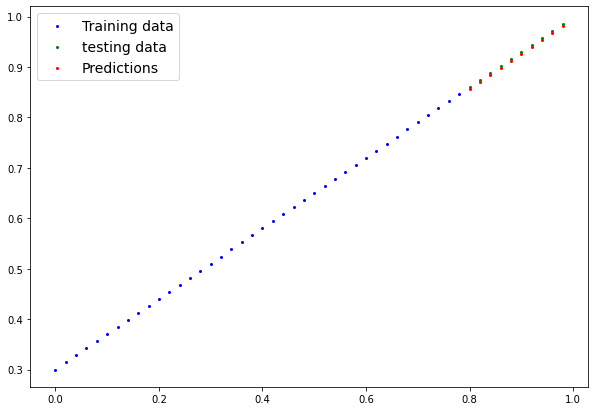

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_prediction(predictions=y_preds_new)

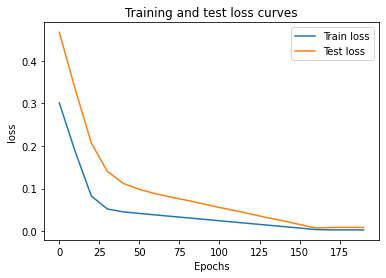

In [ ]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend();

## Saving a model 

There are three main methods you should about for saving and loading models in pyTorch.

1. `torch.save()` - allows you save a Pytorch object in Python's pickle format
2. `torch.load()` - allows you load a save Pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [ ]:
!pip install pathlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# saving the pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


## loading the saved model

In [ ]:
model = LinearRegression()
model.load_state_dict(torch.load(MODEL_SAVE_PATH))
model.eval()

LinearRegression()

### Hey have you even wondered what is the `model.eval()` in the code. Well here is the best resource from stack Overflow
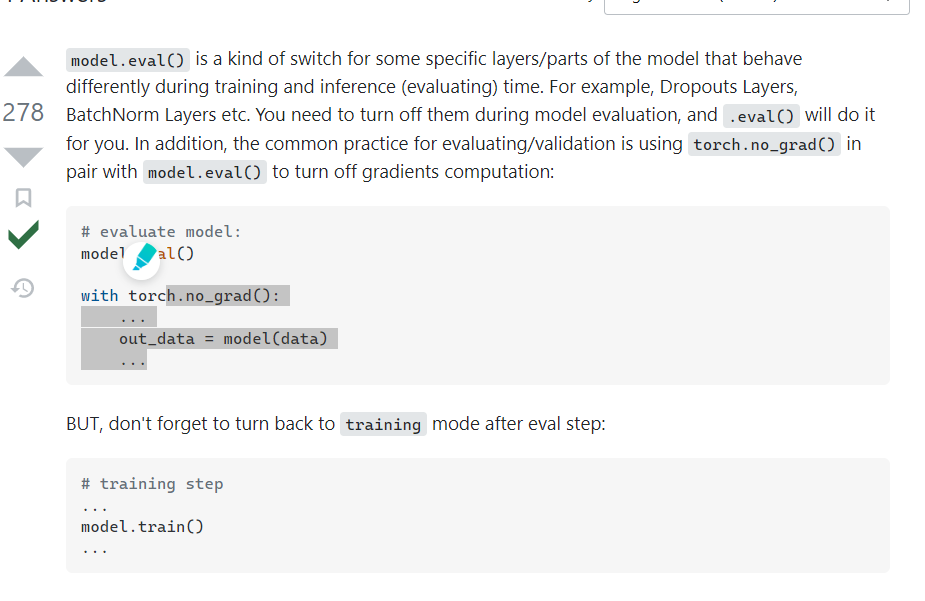

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

### 6. Putting it all together

Let's go back through the steps above and see it all in place. 

In [ ]:
# import pytorch and matplotlib 
import torch
from torch import nn
import matplotlib.pyplot as plt

# check the pytorch version
torch.__version__

'1.13.0+cu116'

### **Create device-agnostic code**.

This means if we've got access to a GPU, our code will use it (potentially for faster computing). If no GPU available, the will default to using CPU

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cuda


In [ ]:
!nvidia-smi

Sun Dec 18 10:48:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    27W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Data

In [ ]:
# create some data using the linear regression formula of y = weight *X + bias
weight = 0.7
bias = 0.3

# create ragne values
start = 0
end = 1
step = 0.02

# create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors would pop up
y = weight*X + bias
X[:10], y[:10], X[10:], y[10:]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]), tensor([[0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [

In [ ]:
train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

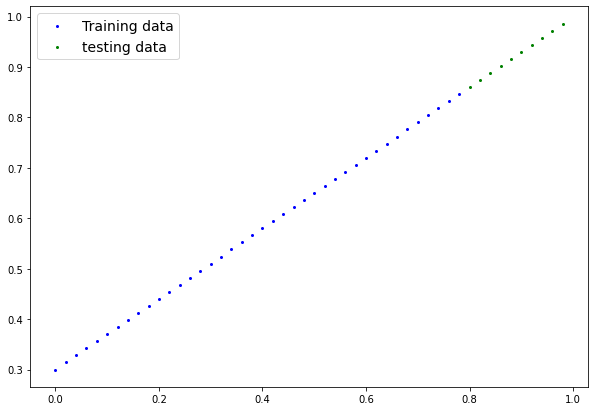

In [ ]:
plot_prediction(X_train, y_train, X_test, y_test)

### Building a pytorch Linear Model

1. using Linear Regression

In [ ]:
# create a linear model by subclassing nn.Module

class LinearRegressionV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionV2()
model_1, model_1.state_dict()

(LinearRegressionV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# check the model to use the target device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# set the model to use the target device 
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizers
* Training loop
* Testing loop

In [ ]:
# set up loss function
loss_fn = nn.L1Loss() # same as MAE

# setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [ ]:
# let's write training loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  # set up the model into training loop
  model_1.train()

  # do the forward pass
  y_pred = model_1(X_train)

  # calculate the loss
  loss = loss_fn(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # Perform backPropogation
  loss.backward()

  # optimizer.step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)
    

In [ ]:
!git init

Initialized empty Git repository in /content/.git/


In [ ]:
!git remote add origin https://github.com/Amanpatel2002-g/Learning-Pytorch.git

In [ ]:
!git add .

In [ ]:
!git commit -m "shifting to github codespaces"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@21c900d81b85.(none)')


In [ ]:
! git config --global user.email apofficial2002@gmail.com

In [ ]:
! git config --global user.name Aman Patel

In [ ]:
!git commit -m "shifting to github codespaces"

[master (root-commit) 5145e5e] shifting to github codespaces
 20 files changed, 50860 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2022.12.15/23.59.07.019477.log
 create mode 100644 .config/logs/2022.12.15/23.59.36.931040.log
 create mode 100644 .config/logs/2022.12.16/00.00.05.134693.log
 create mode 100644 .config/logs/2022.12.16/00.00.19.303646.log
 create mode 100644 .config/logs/2022.12.16/00.00.48.930338.log
 create mode 100644 .config/logs/2022.12.16/00.00.49.771240.log
 create mode 100644 models/01_pytorch_workflow_model_0.pth
 create mode 100755 sample_data/README.md
 create mode 100755 sample_data/anscombe.json
 create mode 100644 sample_data/cal

In [ ]:
! git reset .

In [ ]:
! git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.gitignore

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
! git add .

In [ ]:
! git commit -m "Now shifting to github codespaces"

[master c35bd08] Now shifting to github codespaces
 5 files changed, 47020 deletions(-)
 create mode 100644 .gitignore
 delete mode 100755 sample_data/README.md
 delete mode 100644 sample_data/california_housing_train.csv
 delete mode 100644 sample_data/mnist_test.csv
 delete mode 100644 sample_data/mnist_train_small.csv


In [ ]:
! git push origin master

fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
! git user.name

git: 'user.name' is not a git command. See 'git --help'.
